In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fllod-prediction/sample_submission.csv
/kaggle/input/fllod-prediction/train.csv
/kaggle/input/fllod-prediction/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/fllod-prediction/train.csv")
test = pd.read_csv("/kaggle/input/fllod-prediction/test.csv")
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [3]:
train.drop(["id"], axis = 1, inplace = True)
train.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [4]:
train.corr()['FloodProbability']

MonsoonIntensity                   0.189098
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Deforestation                      0.184001
Urbanization                       0.180861
ClimateChange                      0.184761
DamsQuality                        0.187996
Siltation                          0.186789
AgriculturalPractices              0.183366
Encroachments                      0.178841
IneffectiveDisasterPreparedness    0.183109
DrainageSystems                    0.179305
CoastalVulnerability               0.177774
Landslides                         0.185346
Watersheds                         0.181907
DeterioratingInfrastructure        0.190007
PopulationScore                    0.185890
WetlandLoss                        0.183396
InadequatePlanning                 0.180968
PoliticalFactors                   0.182417
FloodProbability                   1.000000
Name: FloodProbability, dtype: float64

**create Box plot and check for outliers as this dataset is clean, normally distributed, error free, this is the only case left to check**

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

/tmp/ipykernel_18/1168639560.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 5))


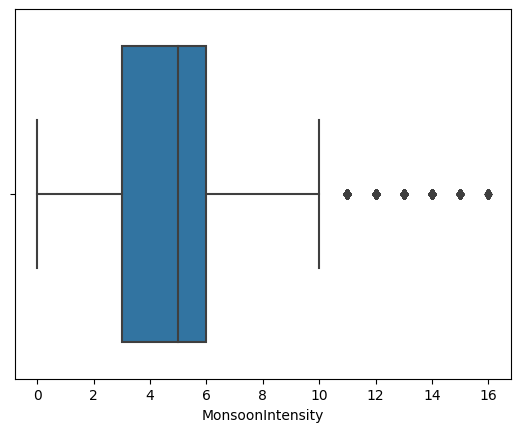

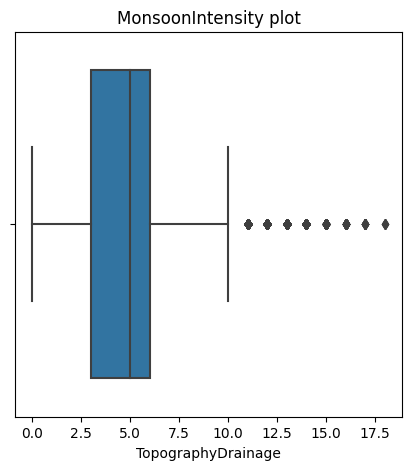

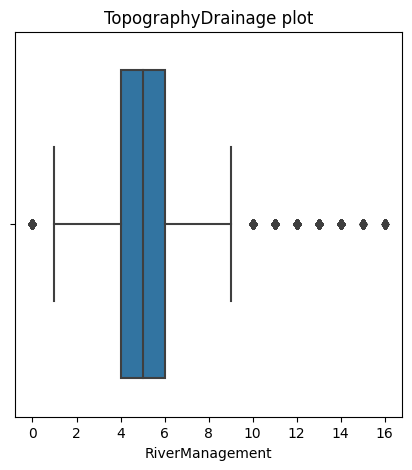

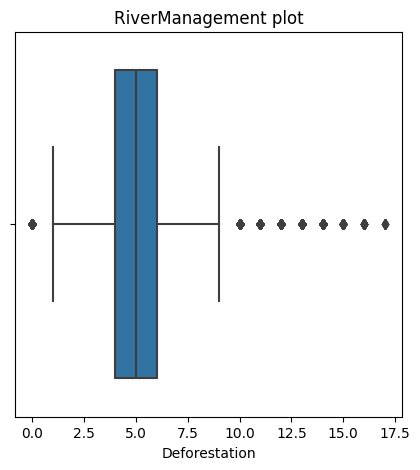

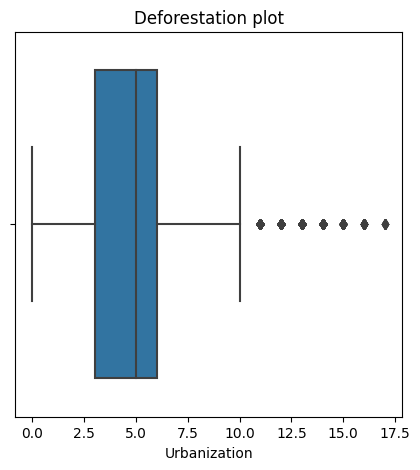

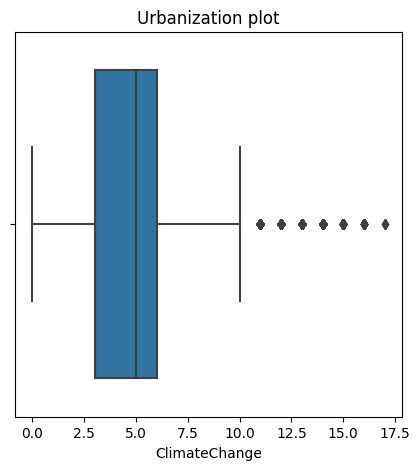

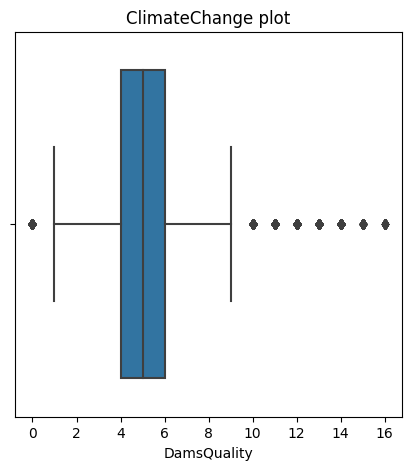

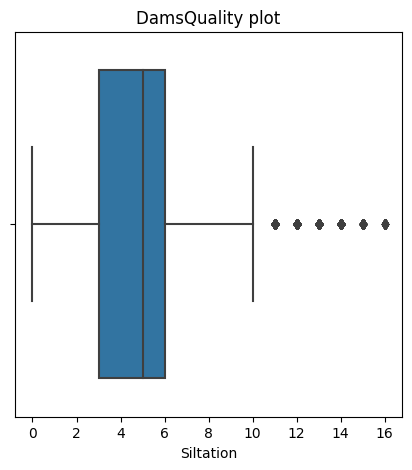

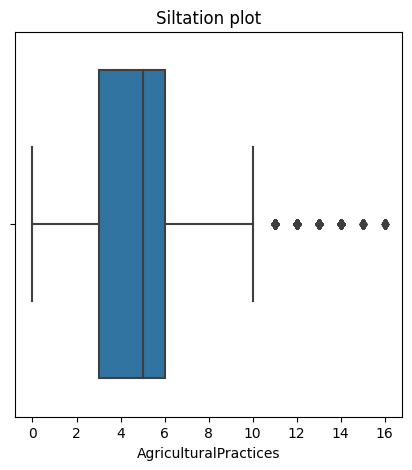

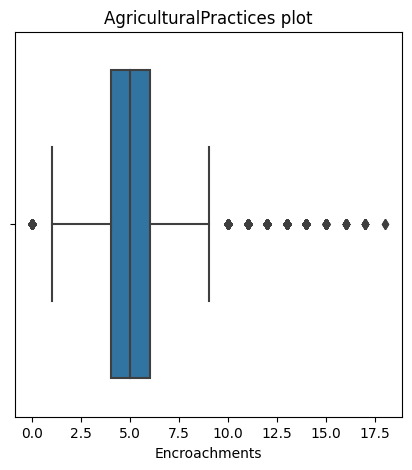

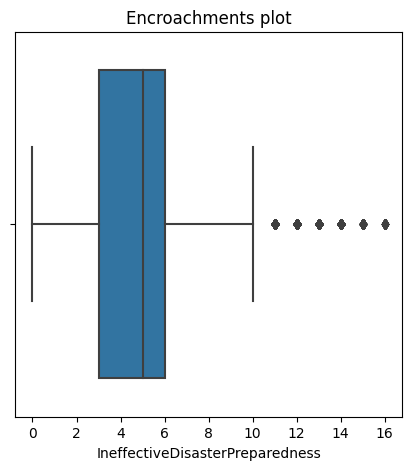

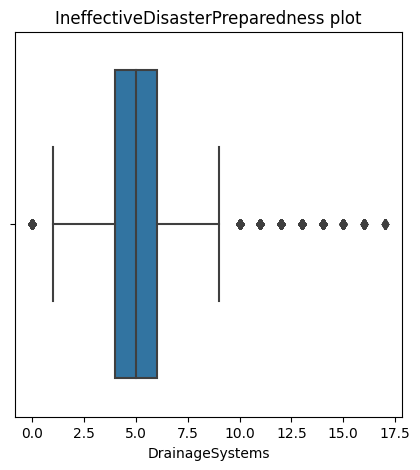

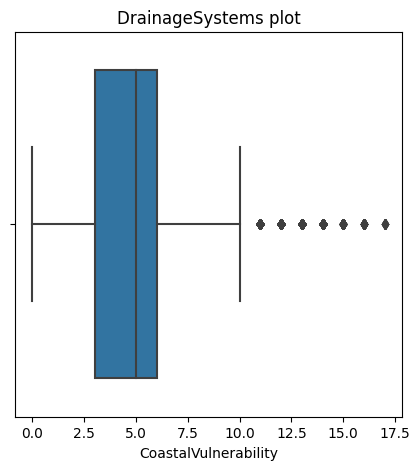

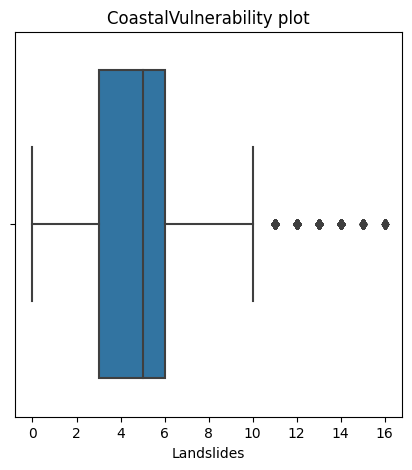

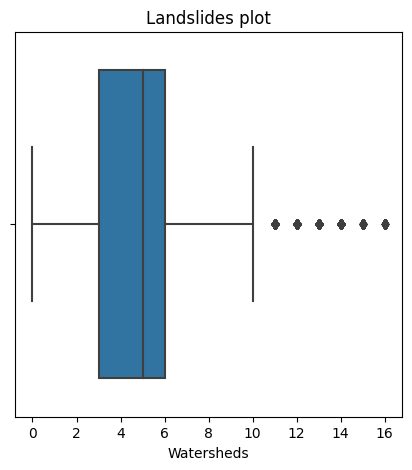

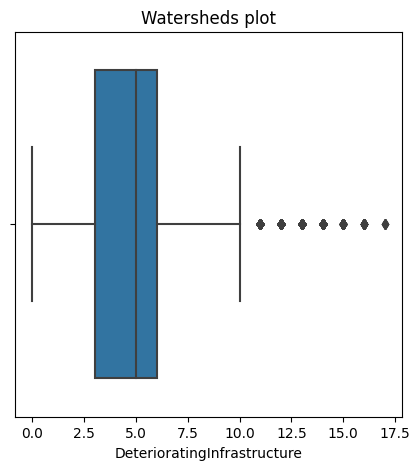

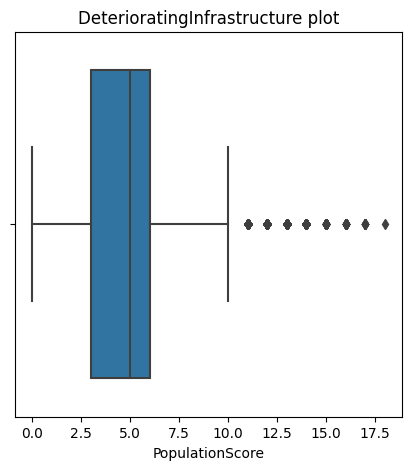

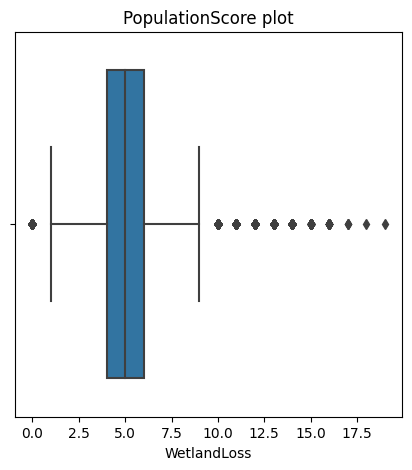

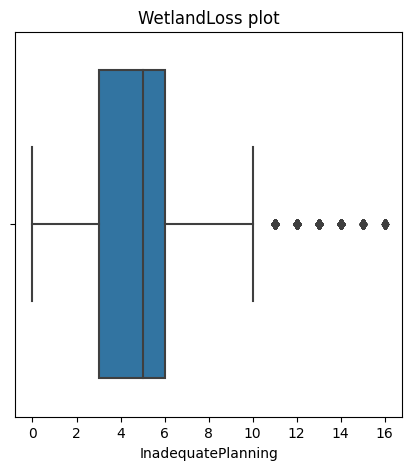

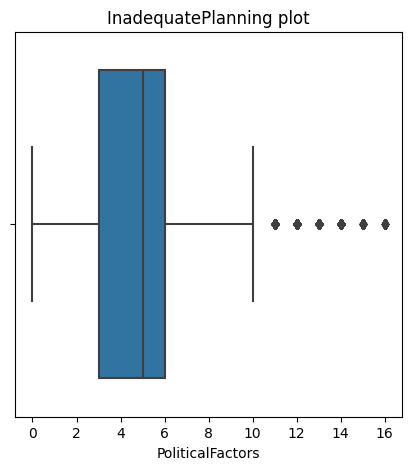

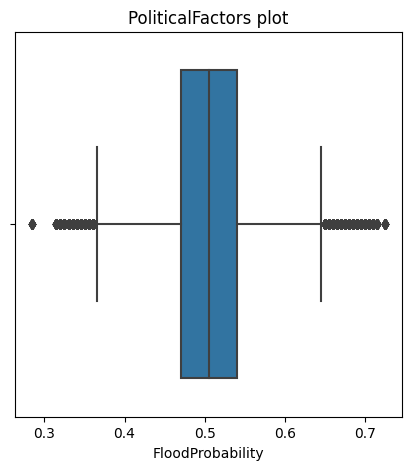

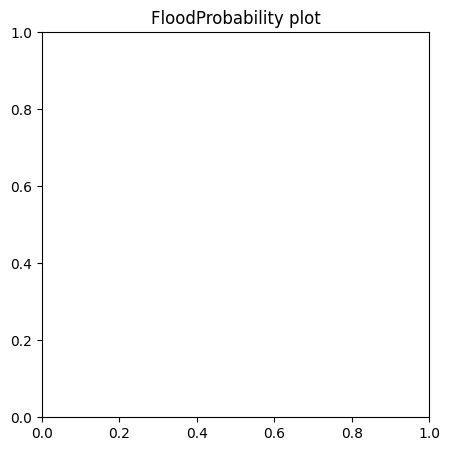

In [6]:
for col in train.columns:
    sns.boxplot(x = train[col], data = train)
    plt.figure(figsize=(5, 5))
    plt.title(f"{col} plot")
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
x_train = train.drop(['FloodProbability'], axis=1)
y_train = train['FloodProbability']
x_test = test.drop(['id'], axis=1)

model used in this is randomforest regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

predict_train = rf_reg.predict(x_train)
mse = mean_squared_error(predict_train, y_train)
r2 = r2_score(predict_train, y_train)
print(f"mean square error : {mse}, r2 score : {r2}")

mean square error : 0.00012579717123959184, r2 score : 0.9293368042986294


In [11]:
y_test = rf_reg.predict(x_test)
submission = pd.DataFrame({'id': test['id'], 'FloodProbability': y_test})
submission.to_csv("submission_file", index=False)